In [0]:
import numpy as np
import pandas as pd
import researchpy as rp
import seaborn as sns
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [0]:
from sklearn import preprocessing
import math

In [0]:
#fixing random seed for reproducibility
np.random.seed(7)

In [0]:
ntc = pd.read_csv('ntcprice.csv')

In [0]:
print(ntc.shape)

(2200, 11)


In [0]:
#sorting values according to date in pandas
ntc=ntc.sort_values('Date',axis=0,ascending=True,inplace=False,kind='quicksort',na_position='last')

Deleting SN columns

In [0]:
del ntc['SN']

In [0]:
ntc.head()

,Date,No. of Transaction,Max Price,Min Price,Closing Price,Traded Shares,Total Amount,Prev. Closing,Difference(Rs),% Change
2199,2010-04-15,13,455.0,422.0,455.0,3300,1464600,414.0,41.0,9.90
2198,2010-04-15,13,455.0,422.0,455.0,3300,1464600,414.0,41.0,9.90
2197,2010-04-15,13,455.0,422.0,455.0,3300,1464600,414.0,41.0,9.90
2196,2010-04-19,3,445.0,441.0,441.0,400,177500,442.0,-1.0,-0.23
2195,2010-04-20,7,445.0,440.0,444.0,3870,1708480,441.0,3.0,0.68


In [0]:
ntc['Closing Price'].describe()

count    2200.000000
mean      615.004782
std       114.911962
min         0.000000
25%       534.000000
50%       647.000000
75%       689.000000
max       940.000000
Name: Closing Price, dtype: float64

In [0]:
ntc['Closing Price'].replace(0,(ntc['Max Price']+ntc['Min Price'])/2,inplace=True)

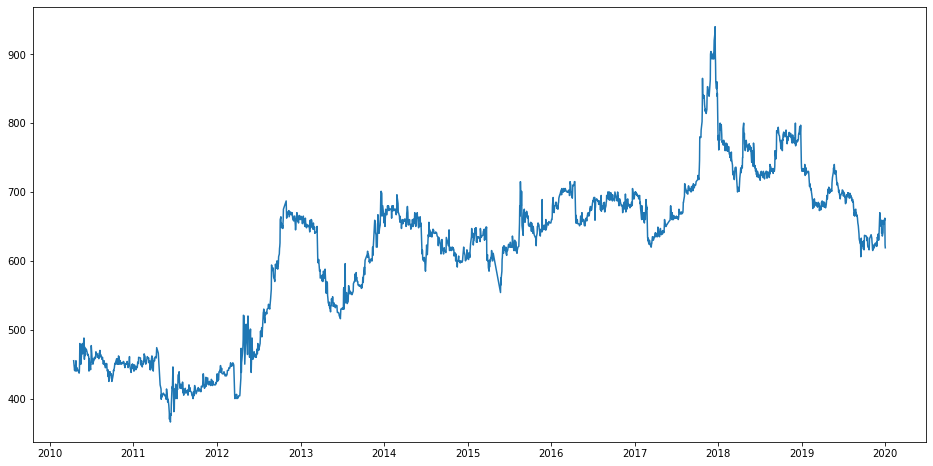

In [0]:
#setting index as date
ntc['Date'] = pd.to_datetime(ntc.Date,format='%Y-%m-%d')
ntc.index=ntc['Date']
plt.figure(figsize=(16,8))
plt.plot(ntc['Closing Price'],label='Close Price History')

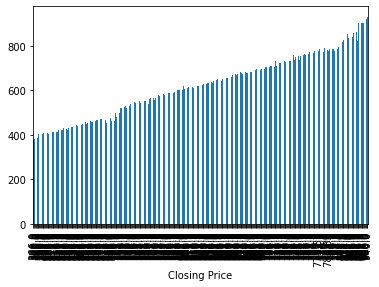

In [0]:
ntc.groupby('Closing Price')['Prev. Closing'].mean().plot.bar()

In [0]:
#selecting only the columns that we are going to predict
data_to_use = ntc.filter(['Closing Price'])
#converting to numpy arrays
dataset = data_to_use.values

In [0]:
#data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dataset_scaled = scaler.fit_transform(dataset)

In [0]:
#walk forward train test
X = np.array(dataset)
train, test = X[0:-200],X[-200:]
print('train=%d, test=%d' % (len(train), len(test)))

train=2000, test=200


RMSE: 6.796


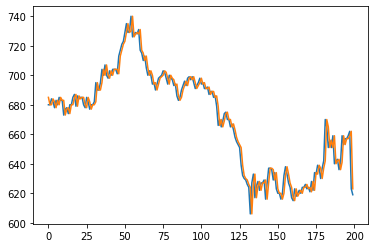

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt
  #walk forward validation
history = [t for t in train]
predictions = list()
for j in range(len(test)):
    #making prediction
  predictions.append(history[-1])
  #observation
  history.append(test[j])
#report performance
rmse = sqrt(mean_squared_error(test,predictions))
print('RMSE: %.3f' %rmse)
plt.plot(test)
plt.plot(predictions)
#plt.plot(persistence_values,scores)
plt.show()

In [0]:
#data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train)

In [0]:
X_train = []
y_train = []
for i in range(60,len(train_scaled)):
  X_train.append(train_scaled[i-60:i,0])
  y_train.append(train_scaled[i,0])
  if i <= 60:
    print(X_train)
    print(y_train)
    print()

[array([0.15505226, 0.15505226, 0.15505226, 0.13066202, 0.1358885 ,
       0.13414634, 0.12891986, 0.15505226, 0.13763066, 0.13763066,
       0.12891986, 0.13763066, 0.12369338, 0.12891986, 0.1533101 ,
       0.19860627, 0.18815331, 0.14634146, 0.14634146, 0.16202091,
       0.16550523, 0.19686411, 0.19686411, 0.17247387, 0.19860627,
       0.18118467, 0.21254355, 0.19686411, 0.15853659, 0.18989547,
       0.16724739, 0.18292683, 0.18118467, 0.18118467, 0.18466899,
       0.18292683, 0.17595819, 0.17073171, 0.17247387, 0.16898955,
       0.17073171, 0.16376307, 0.12891986, 0.16027875, 0.15505226,
       0.14808362, 0.13240418, 0.14634146, 0.14634146, 0.19337979,
       0.16376307, 0.15505226, 0.15156794, 0.16027875, 0.14634146,
       0.15679443, 0.15679443, 0.16027875, 0.16376307, 0.16027875])]
[0.16376306620209058]



In [0]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
#reshape the data in 3d
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
X_train.shape


(1940, 60, 1)

In [0]:
y_train.shape

(1940,)

In [0]:
import tensorflow as tf
import io
import math

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [0]:
from tensorflow.keras import regularizers

In [0]:
#build the lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dense(25,activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(1))

In [0]:
#compile the model
model.compile(optimizer='adam',metrics=['accuracy'],loss = 'mean_squared_error')

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_loss',patience=10, min_delta=1e-3,mode='auto')

In [0]:
history= model.fit(X_train, y_train, batch_size=200, epochs=1000, verbose=1, callbacks=[es],validation_split=0.20,shuffle=False)

Train on 1552 samples, validate on 388 samples
Epoch 1/1000
1552/1552 [==============================] - 2s 1ms/step - loss: 0.1244 - accuracy: 6.4433e-04 - val_loss: 0.2514 - val_accuracy: 0.0000e+00
Epoch 2/1000
1552/1552 [==============================] - 2s 990us/step - loss: 0.0344 - accuracy: 6.4433e-04 - val_loss: 0.0365 - val_accuracy: 0.0026
Epoch 3/1000
1552/1552 [==============================] - 2s 993us/step - loss: 0.0201 - accuracy: 6.4433e-04 - val_loss: 0.0172 - val_accuracy: 0.0026
Epoch 4/1000
1552/1552 [==============================] - 2s 988us/step - loss: 0.0254 - accuracy: 6.4433e-04 - val_loss: 0.0413 - val_accuracy: 0.0026
Epoch 5/1000
1552/1552 [==============================] - 2s 980us/step - loss: 0.0112 - accuracy: 6.4433e-04 - val_loss: 0.0279 - val_accuracy: 0.0026
Epoch 6/1000
1552/1552 [==============================] - 2s 984us/step - loss: 0.0097 - accuracy: 6.4433e-04 - val_loss: 0.0238 - val_accuracy: 0.0026
Epoch 7/1000
1552/1552 [===============

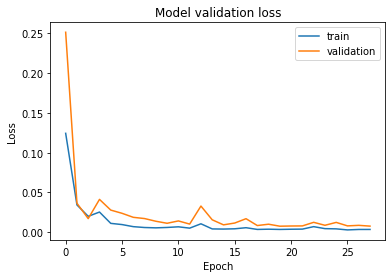

In [0]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','validation'], loc='upper right')
plt.show()

In [0]:
In = dataset_scaled[len(dataset)-len(test)-60:,:]

In [0]:

#dividing into x_test and y_test
X_test = []
y_test = test
for i in range(60,len(In)):
  X_test.append(In[i-60:i,0])


In [0]:
y_test.shape

(200, 1)

In [0]:
#Convert the data to numpy array
X_test = np.array(X_test)

In [0]:
#reshape the data
X_test =np.reshape(X_test,(X_test.shape[0] ,X_test.shape[1],1))

In [0]:
X_test.shape

(200, 60, 1)

In [0]:
#Getting the models predicted values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

In [0]:
rmse = np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

18.10030919569437

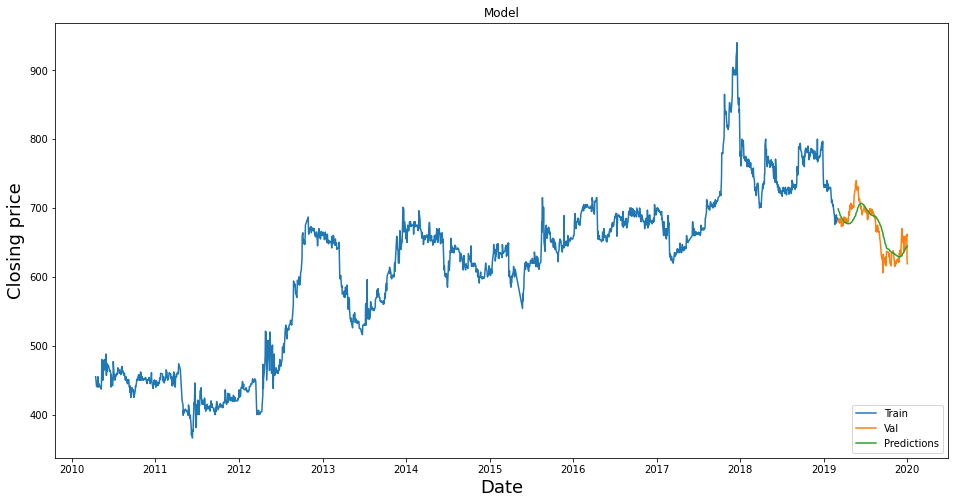

In [0]:
#visualize the data
train, test = data_to_use[0:-200],data_to_use[-200:]
valid = data_to_use[len(train):]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price', fontsize=18)
plt.plot(train['Closing Price'])
plt.plot(valid[['Closing Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [0]:
valid.tail()

,Closing Price,Predictions
Date,,
2019-12-26,657.0,642.214966
2019-12-29,659.0,642.907898
2019-12-30,662.0,643.628601
2019-12-31,623.0,644.390442
2020-01-01,619.0,644.933350


In [0]:
#Get the models predicted price values 
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

In [0]:
#get the quote
ntc = pd.read_csv('ntcprice.csv')
#creating a new dataframe
new_ntc = ntc.filter(['Closing Price'])
#get the last 120 days data and converting dataframe to an array
last_60_days = new_ntc[-60:].values
#scaling the data to be values between 0 and 1
last_60_days_scaled = scaler.fit_transform(last_60_days)
#creating an empty list
X_test = []
#append the values
X_test.append(last_60_days_scaled)
#converting it into numpy array
X_test = np.array(X_test)
#reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[453.47495]]
